<br />

<h1 align="center">OOP for Data Science</h1>
<h5 align="center">by</h5>
<h3 align="center">Monde Anna</h3>

<br />
<br />


In [1]:
from utilities.influence_calculator import InfluenceCalculator
from utilities.model_generator import generate_feature_sets
from utilities.model_generator import generate_models
from utilities.plotter import HistogramPlotter
from utilities.plotter import ScatterPlotter
import statsmodels.api as sm
import pandas as pd
import numpy as np


<br />

<h2 align="center">Introduction</h2>

<br />

<p>We shall look at the errors found the results of out models as built from the <a href="http://syllabus.africacode.net/projects/data-science-specific/multivariate-linear-regression/">Multuvariate Linear Regression</a> Project. Note that there are three models, each being pitted against each other. For details, look at the <i>Feature Sets</i> detailed below.</p>

<p>It is worth further noting that:
    <ul>
        <li>All models assume a positive constant value, as one would assume payment for work done</li>
        <li>The logic behind data cleaning, normalisation and feature selection for model 3 and in the <b><i>Feature Selector</i></b> notebook</li>
    </ul>
</p>

<p>For the sake of convinience, a link to the <b><i><a href="../assets/brief.md">Brief</a></i></b>.</p>

<br />
<br />


<br />

<h2 align="center">Project Preparation</h2>

<br />
<br />


<h3 align="center">Generate Models</h3>

<br />

<h5 align="center">Feature Sets</h5>

<br />

<p><b>NOTE:</b> Of the models provided, Model 1 and Model 2 are suggested by the <a href="http://syllabus.africacode.net/projects/data-science-specific/oop-for-data-science/">brief</a>. Model 3 is generated by this notebook's author. For more details see the "Model Generator" notebook.</p>

<br />

<table style="width:100%" align="center">
    <colgroup>
        <col style="text-align:center">
    </colgroup>  
    <tr>
        <th style="text-align:center">MODEL 1</th>
        <th style="text-align:center">MODEL 2</th>
        <th style="text-align:center">MODEL 3</th>
    </tr>
    <tr>
        <td style="text-align:center">Prior Experience: Original</td>
        <td style="text-align:center">Prior Experience: Original</td>
        <td style="text-align:center">-</td>
    </tr>
    <tr>
        <td style="text-align:center">Years Worked</td>
        <td style="text-align:center">Years Worked</td>
        <td style="text-align:center">Years Worked</td>
    </tr>
    <tr>
        <td style="text-align:center">Years at Rank</td>
        <td style="text-align:center">-</td>
        <td style="text-align:center">-</td>
    </tr>
    <tr>
        <td style="text-align:center">Market Value</td>
        <td style="text-align:center">Market Value</td>
        <td style="text-align:center">Market Value</td>
    </tr>
    <tr>
        <td style="text-align:center">Has Degree</td>
        <td style="text-align:center">Has Degree</td>
        <td style="text-align:center">-</td>
    </tr>
    <tr>
        <td style="text-align:center">Has Other Qualification</td>
        <td style="text-align:center">Has Other Qualification</td>
        <td style="text-align:center">-</td>
    </tr>
    <tr>
        <td style="text-align:center">Employee Position</td>
        <td style="text-align:center">Employee Position</td>
        <td style="text-align:center">-</td>
    </tr>
    <tr>
        <td style="text-align:center">-</td>
        <td style="text-align:center">-</td>
        <td style="text-align:center">Employee Position: Executive</td>
    </tr>
    <tr>
        <td style="text-align:center">Is Male</td>
        <td style="text-align:center">Is Male</td>
        <td style="text-align:center">-</td>
    </tr>
    <tr>
        <td style="text-align:center">Field of Work: Engineering</td>
        <td style="text-align:center">Field of Work: Engineering</td>
        <td style="text-align:center">Field of Work: Engineering</td>
    </tr>
    <tr>
        <td style="text-align:center">Field of Work: Finance</td>
        <td style="text-align:center">Field of Work: Finance</td>
        <td style="text-align:center">-</td>
    </tr>
    <tr>
        <td style="text-align:center">Field of Work: Marketing</td>
        <td style="text-align:center">Field of Work: Marketing</td>
        <td style="text-align:center">-</td>
    </tr>
    <tr>
        <td style="text-align:center">Years Absent</td>
        <td style="text-align:center">Years Absent</td>
        <td style="text-align:center">-</td>
    </tr>
</table>

<br />
<br />


In [2]:
feature_sets = generate_feature_sets()
models = generate_models()


<br />

<h3 align="center">Import Cleaned and Transformed Data</h3>

<br />
<br />


In [3]:
df = pd.read_csv("../data/salary_log_transformed.csv")
X = df.drop(columns=["salary"])
y = np.array(df["salary"])


<br />

<h2 align="center">Predictions &amp; Influences</h2>

<br />
<br />


In [4]:
predictions = {}
influences = {}

for i in range(1, 4):
    prediction = models[f"Model {i}"].predict(
        sm.add_constant(X[feature_sets[f"Model {i}"]])
    )
    predictions[f"Model {i}"] = np.array(prediction)

    influence = InfluenceCalculator(models[f"Model {i}"])
    influences[f"Model {i}"] = influence


<br />

<h2 align="center">Visualisation Againsts Residuals</h2>
<h3 align="center">Histograms</h3>
<h5 align="center">of</h5>
<h3 align="center">Residuals</h3>

<br />
<br />


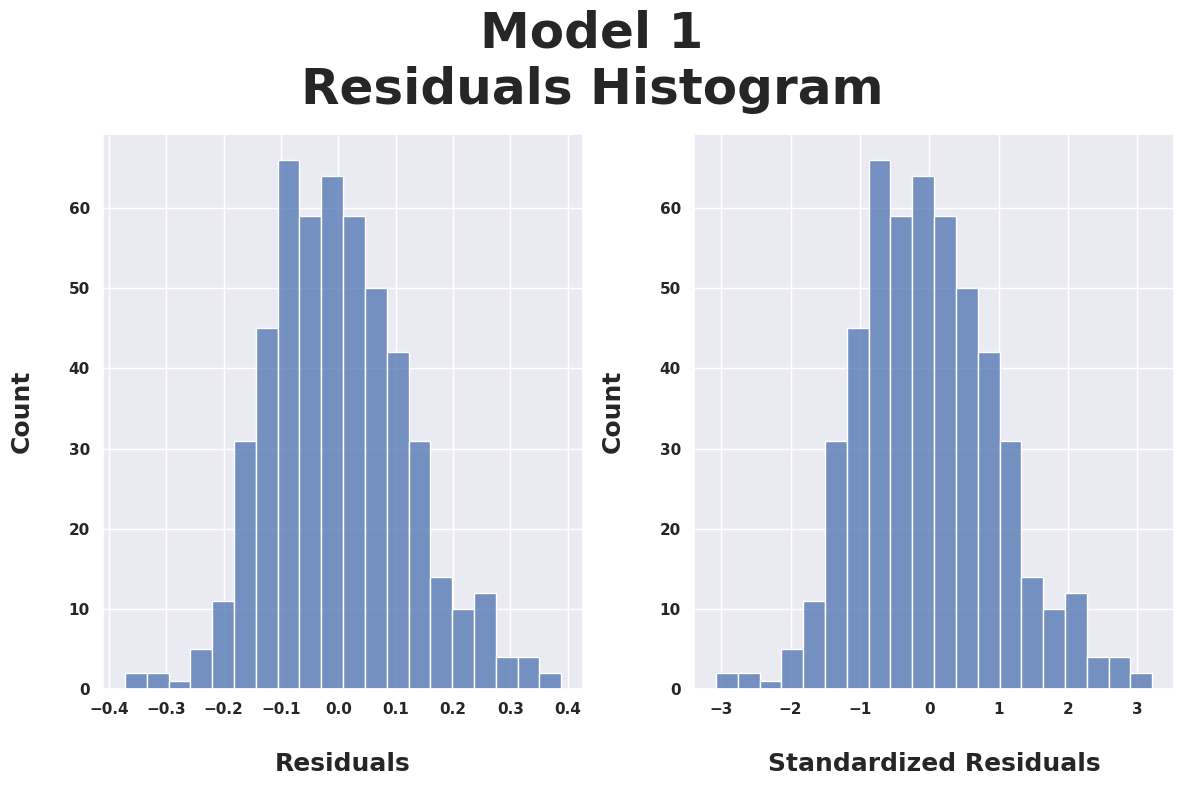

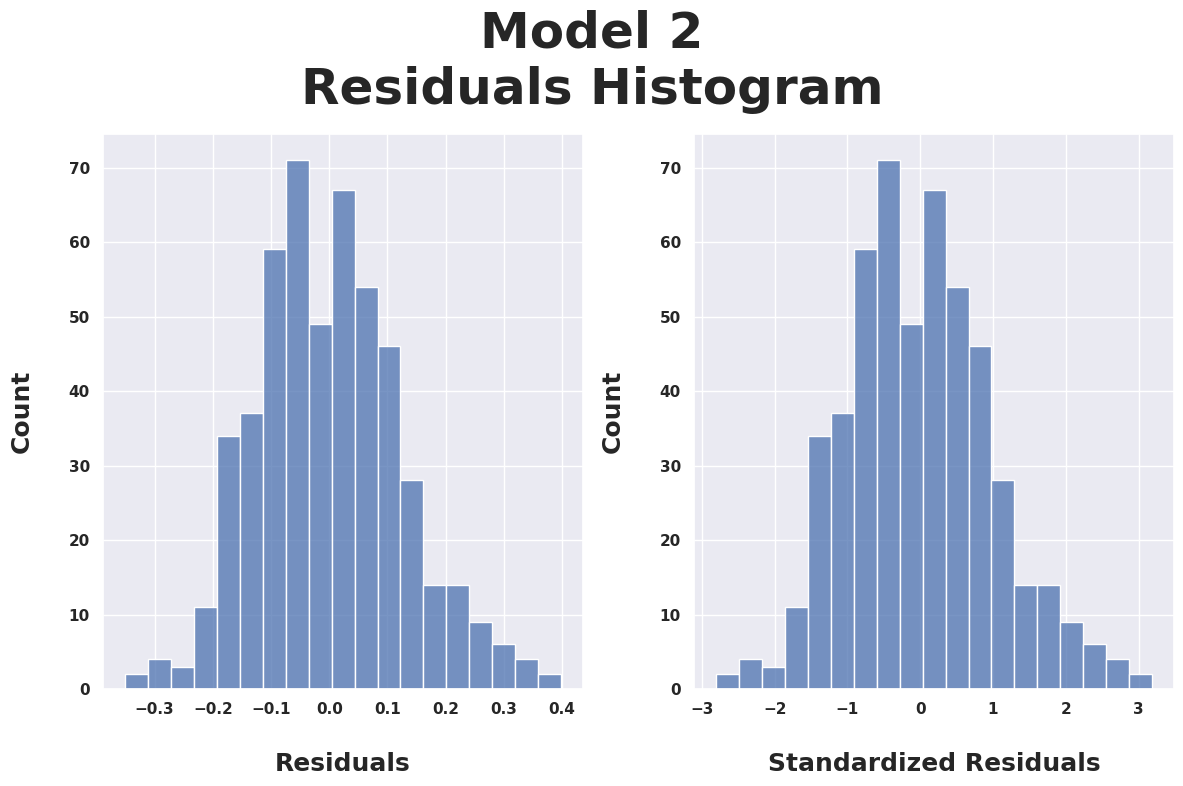

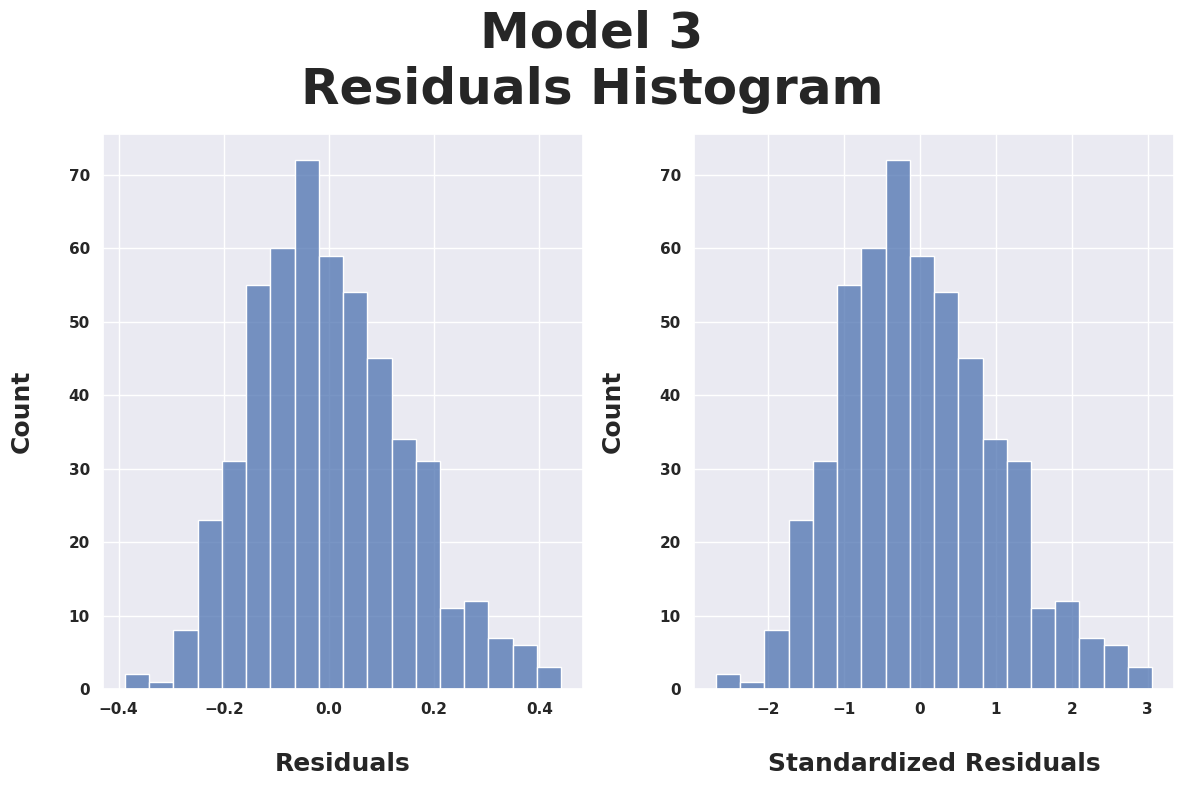

In [5]:
for model_name, prediction in predictions.items():
    HistogramPlotter(y, prediction).plot(model_name=model_name)


<br />

<h3 align="center">Observations</h3>

<br />

<ul>
    <li>The general shape is undisturbed for all graphs</li>
    <li>Models 1 and 3 look to be similar, barr the slightly different counts</li>
    <li>All observable changes are minutiae</li>
</ul>

<br />
<br />


<h3 align="center">Scatter Plots</h3>
<h5 align="center">Predictions vs. Residuals</h5>

<br />
<br />


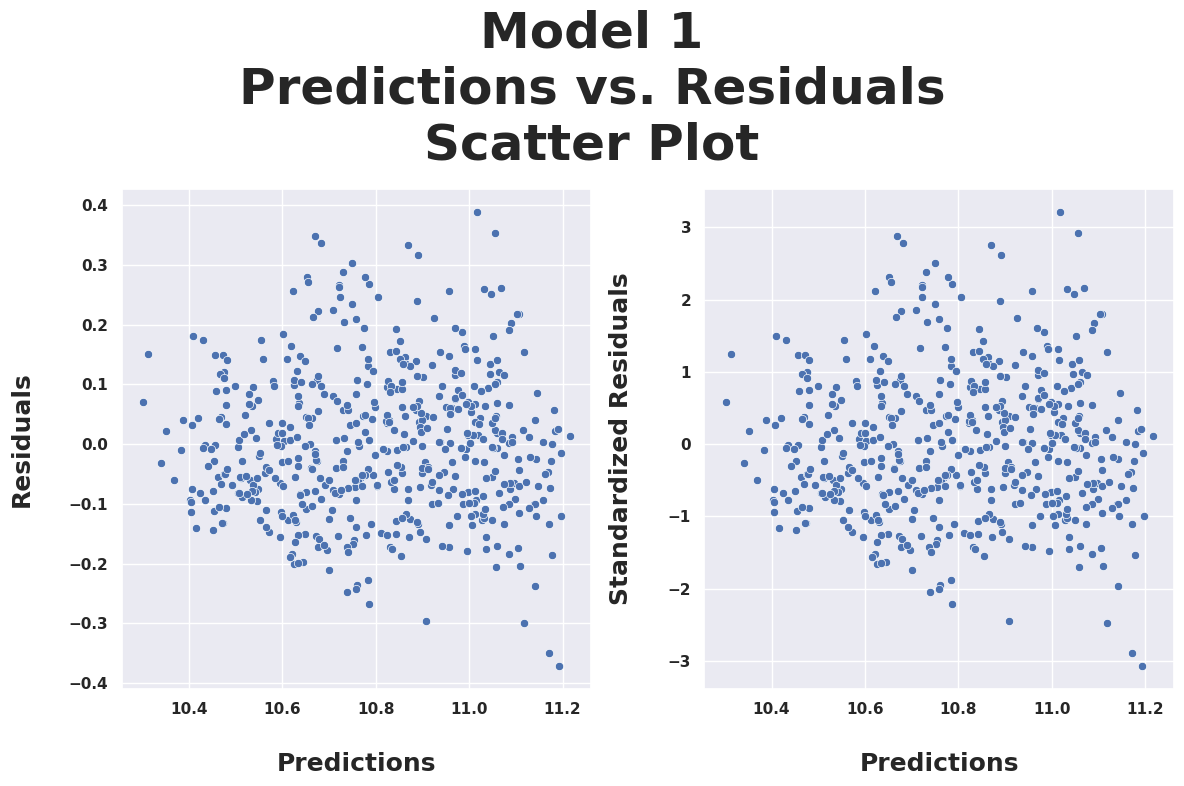

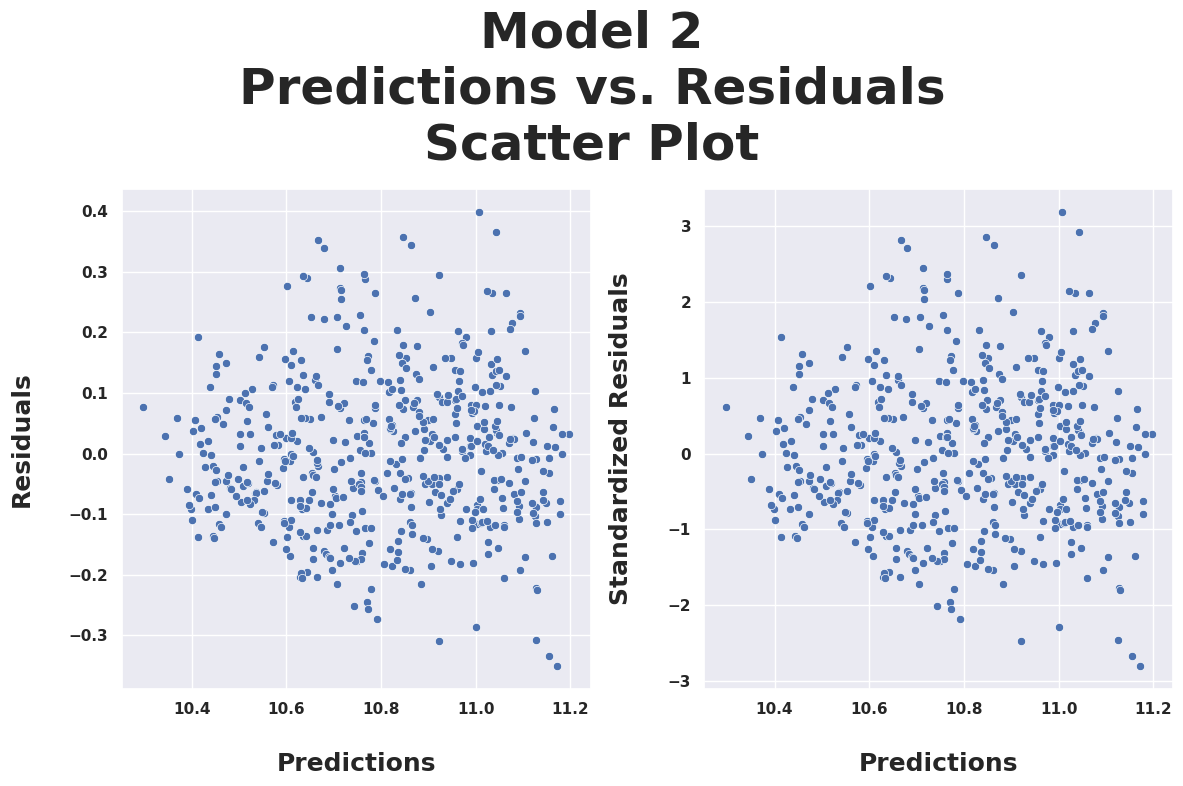

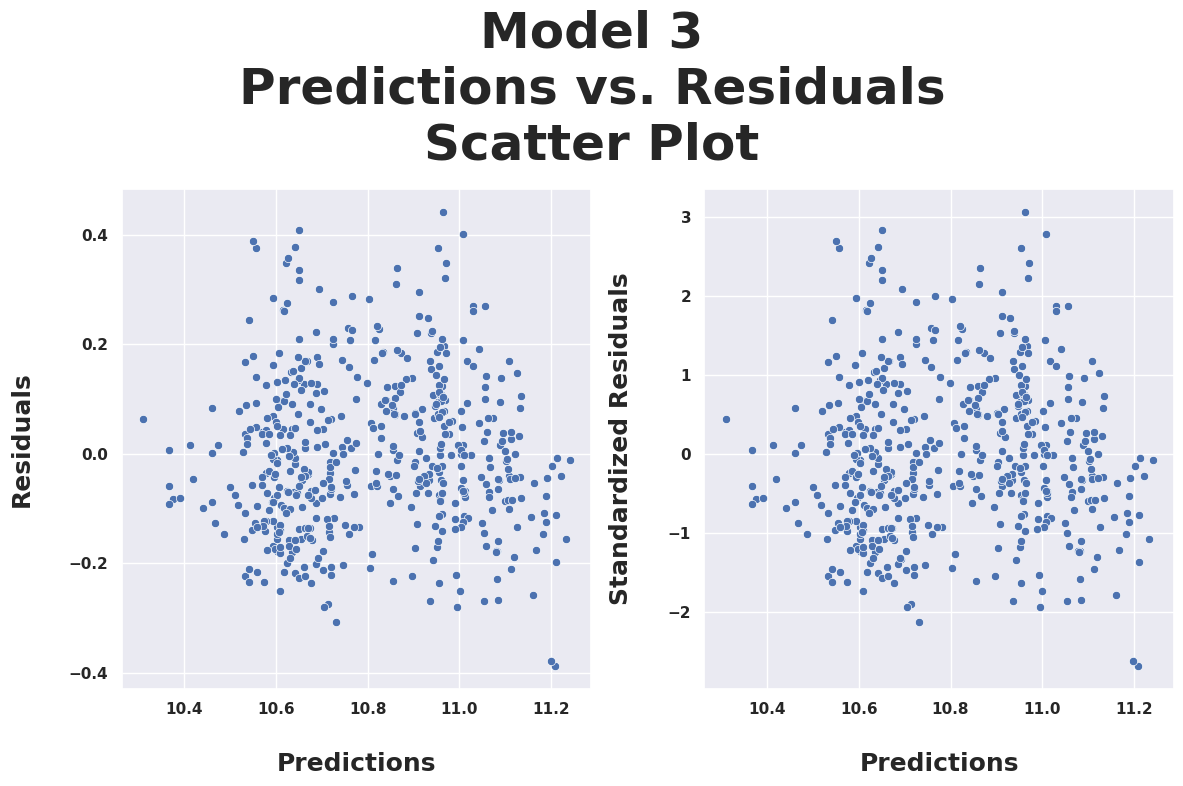

In [6]:
for model_name, prediction in predictions.items():
    ScatterPlotter(y, prediction).plot(model_name=model_name)


<br />

<h3 align="center">Observations</h3>

<br />

<ul>
    <li>Model 1 and Model 2 very little difference</li>
    <li>Standardised, Model 2 has:
        <ul>
            <li>More points in the range 1 and 2 as opposed to Model 1</li>
            <li>More densely packed points between -2 and -3 than Model 1</li>
        </ul>
    </li>
    <li>Model 3 is more densely packed than the others</li>
    <li>Model 3 has fewer points outside of |2|</li>
    <li>Model 3 has a more distince cluster of two neighbouring groups</li>
</ul>

<br />
<br />


<h3 align="center">Bubble Charts</h3>
<h5 align="center">Leverage vs. Residuals</h5>

<br />

<p>Leverage graphs using Cook's Distance in order to help show us if we have any outliers acting as influences on the outputs. Each point is weighted for influence and has it's index number marked for ease of reference.</p>

<br />
<br />


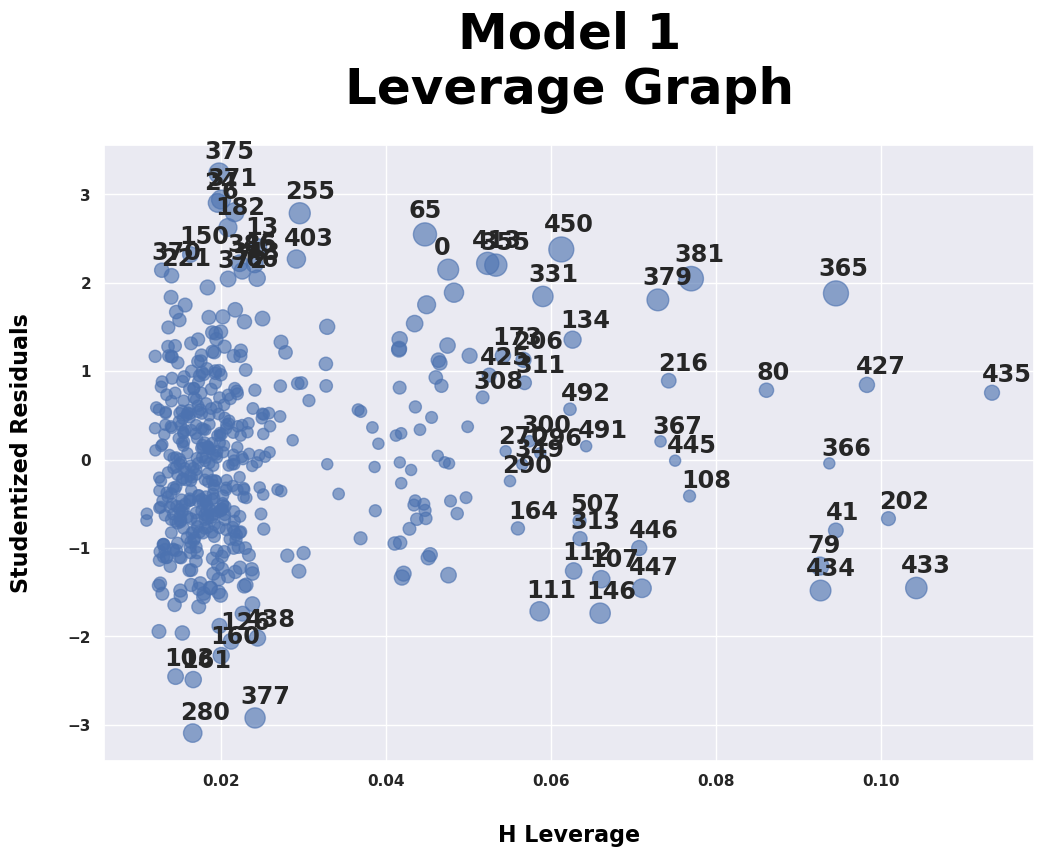

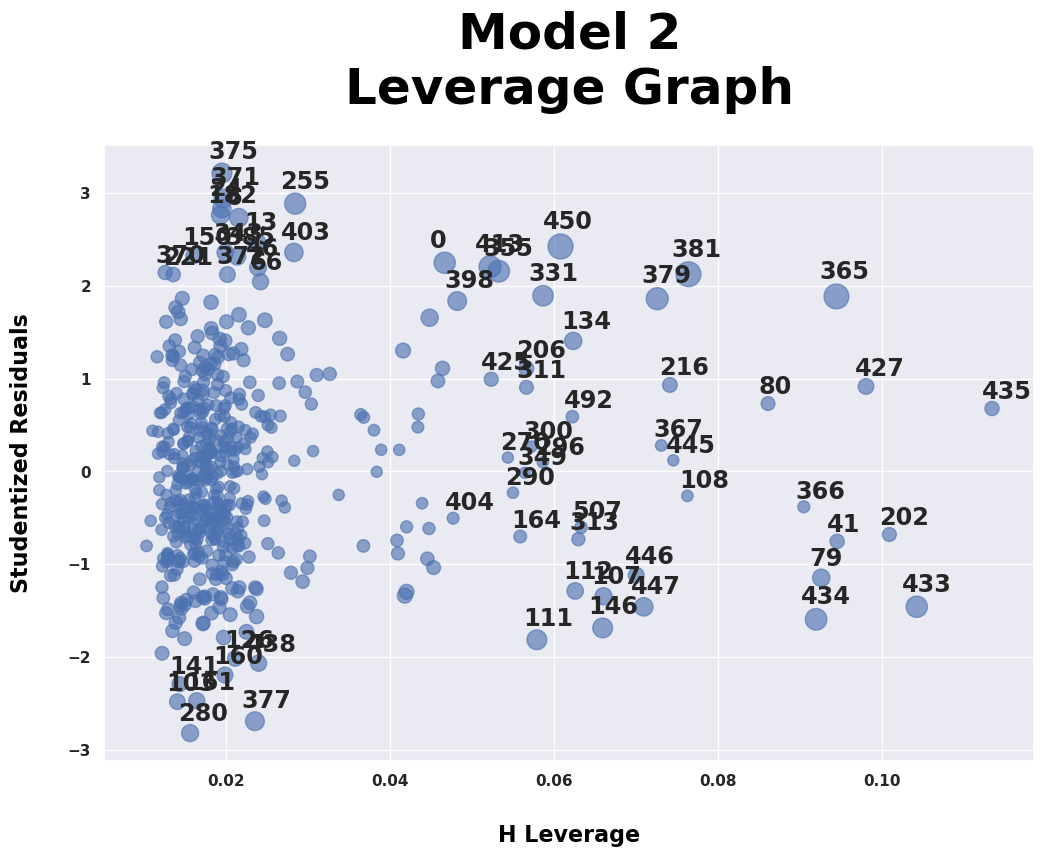

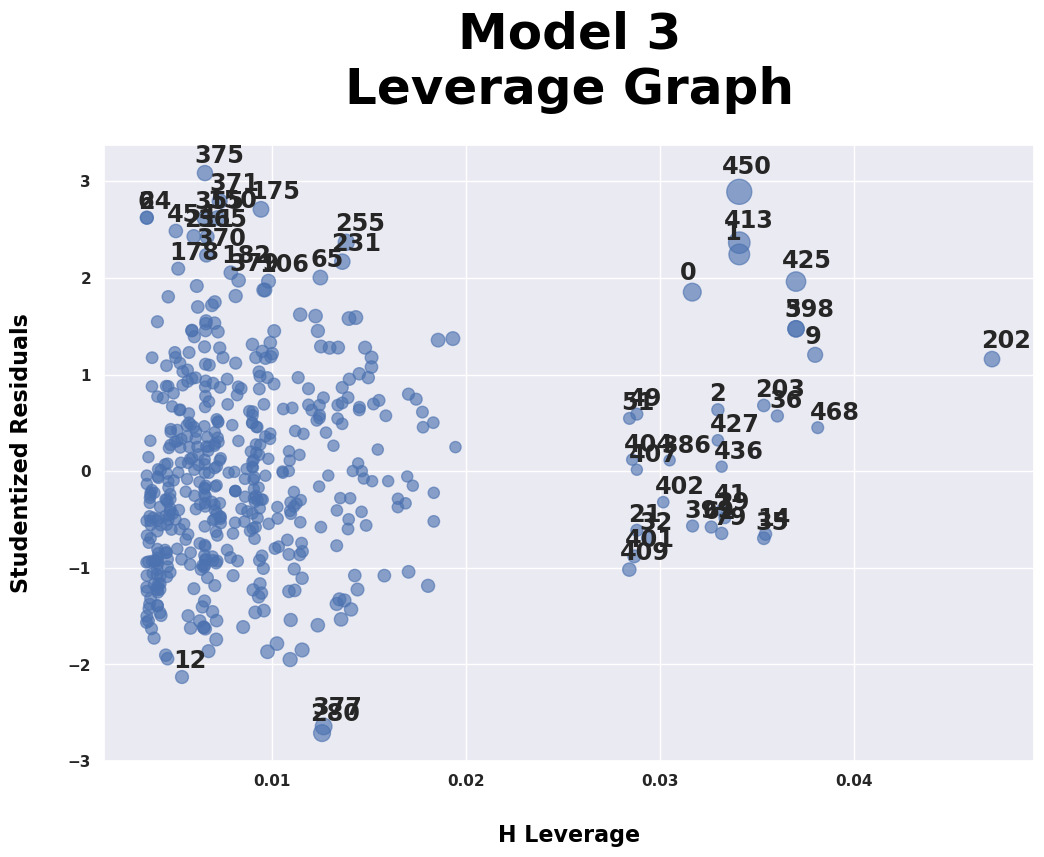

In [7]:
for model_name, influence in influences.items():
    influence.show(model_name=model_name)


<br />

<h3 align="center">Observations</h3>

<br />

<ul>
    <li>Model 1 and Model 2 have:
        <ul>
            <li>As slew of points above 0.04 which are mainly marked as being influential</li>
                <ul>
                    <li><b>Recall:</b>The original Prior Experience feature had what looked to be outliers</li>
                    <li><b>Recall:</b>For other features, we have removed outliers using the IQR method</li>
                </ul>
            <li>Points around 0.02 that go beyond |3| or are markedly close</li>
            <li>All is is mostly indistinguishable minor variations</li>
        </ul>
    </li>
    <br />
    <li>Model 3 is:
        <ul>
            <li>More densely packed than the others</li>
            <li>Has more points centered around 0.01</li>
            <li>Looks to have 0.6 as the furthest possible point</li>
            <li>Has high influence values at a levarage between 0.03 and 0.04</li>
            <li>Has some high leverage values around a standardised residuals' value of 3 with one distinct outlier</li>
        </ul>
    </li>
</ul>

<br />
<br />


<br />

<h2 align="center">Conclusion</h2>

<br />

<p>All in all we have observed taht:
    <ul>
        <li>Model 1 and Model 2 are nearly indistinguishable</li>
        <li>Model 3, which removes the majority of the features in Model's 1 and 2, shows lower influence</li>
        <li>All models have an ever so slighlt positive skew, though the shape could be regarded as normal depending on how pedantic we are being</li>
    </ul>
</p>

<br />
<br />
